### Laplace Equation

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

class field_laplace:
    def __init__(self, nx, len_x, ny, len_y, c):
        
        dx = len_x/(nx-1)
        dy = len_y/(ny-1)

        x = np.linspace(0, len_x, nx)
        y = np.linspace(0, len_y, ny)
        
        self.c = c
        self.x = x
        self.y = y
        self.nx = nx
        self.dx = dx
        self.ny = ny
        self.dy = dy
        self.grid = np.zeros((nx,ny))

In [33]:
def plot(field):
    grid = field.grid
    x = field.x
    y = field.y
    
    xs, ys = np.meshgrid(x,y)

    fig = plt.figure(figsize=(11, 7), dpi=100)
    ax = fig.gca(projection='3d')
    ax.plot_surface(xs, ys, grid, rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=False)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.view_init(30, 225)
    
    plt.show()

In [34]:
def update_loop(field, l1norm_target):
    p = field.grid
    dx = field.dx
    dy = field.dy
    c = field.c
    y = field.y
    l1norm = 1
    
    while l1norm > l1norm_target: 
        pn = p.copy()
        p[1:-1, 1:-1] = ((dy**2 * (pn[1:-1, 2:] + pn[1:-1, 0:-2]) +
                         dx**2 * (pn[2:, 1:-1] + pn[0:-2, 1:-1])) /
                        (2 * (dx**2 + dy**2)))
        
        p[:, 0] = 0  # p = 0 @ x = 0
        p[:, -1] = y  # p = y @ x = 2
        p[0, :] = p[1, :]  # dp/dy = 0 @ y = 0
        p[-1, :] = p[-2, :]  # dp/dy = 0 @ y = 1
        
        l1norm = (np.sum(np.abs(p[:]) - np.abs(pn[:])) /
                np.sum(np.abs(pn[:])))
        
        

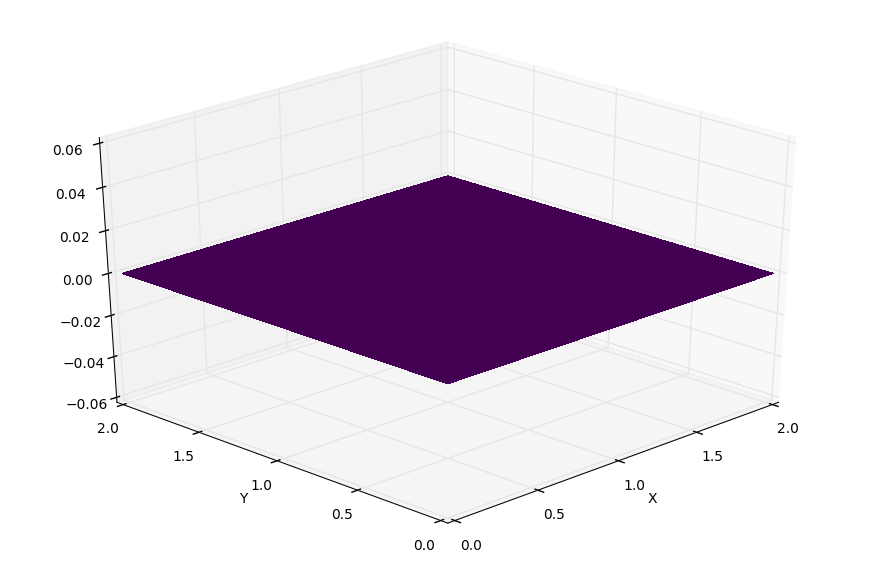

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:21: RuntimeWarning: divide by zero encountered in double_scalars


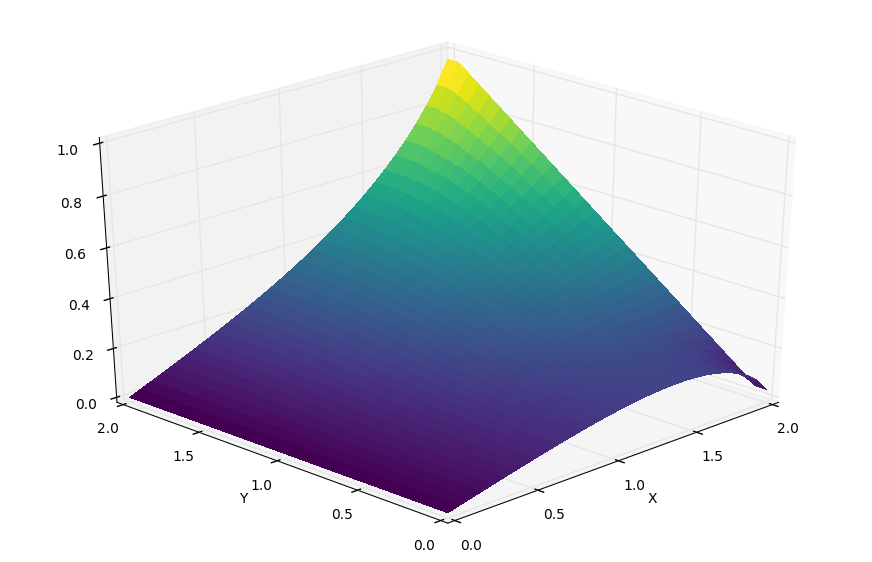

In [35]:
laplace_field = field_laplace(31, 2, 31, 2, 1)
plot(laplace_field)
update_loop(laplace_field, 1e-4)
plot(laplace_field)